Student grades prediction

Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.

Dataset Link-
•  https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [22]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [24]:
df_null=df.isnull()
df_null

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
568,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
569,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

## there are  null values present in most of the coumns only some columns ahve no null values so lets fill null values first

In [26]:
#filling null values using mode method
for i in df_null:
        df[i]=df[i].fillna(df[i].mode()[0]) 

In [27]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

## now we do not have null values

In [28]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64


A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64


A     178
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64


A     97
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64


A-    107
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64


A     151
A-    134
B+     60
B      51

we do not need seat number for any type of analysis and it has no relation with output so i am droping it

In [31]:
df = df.drop(columns=['Seat No.'])

In [32]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [33]:
df.nunique()

PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [37]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


  0%|          | 0/41 [00:00<?, ?it/s]

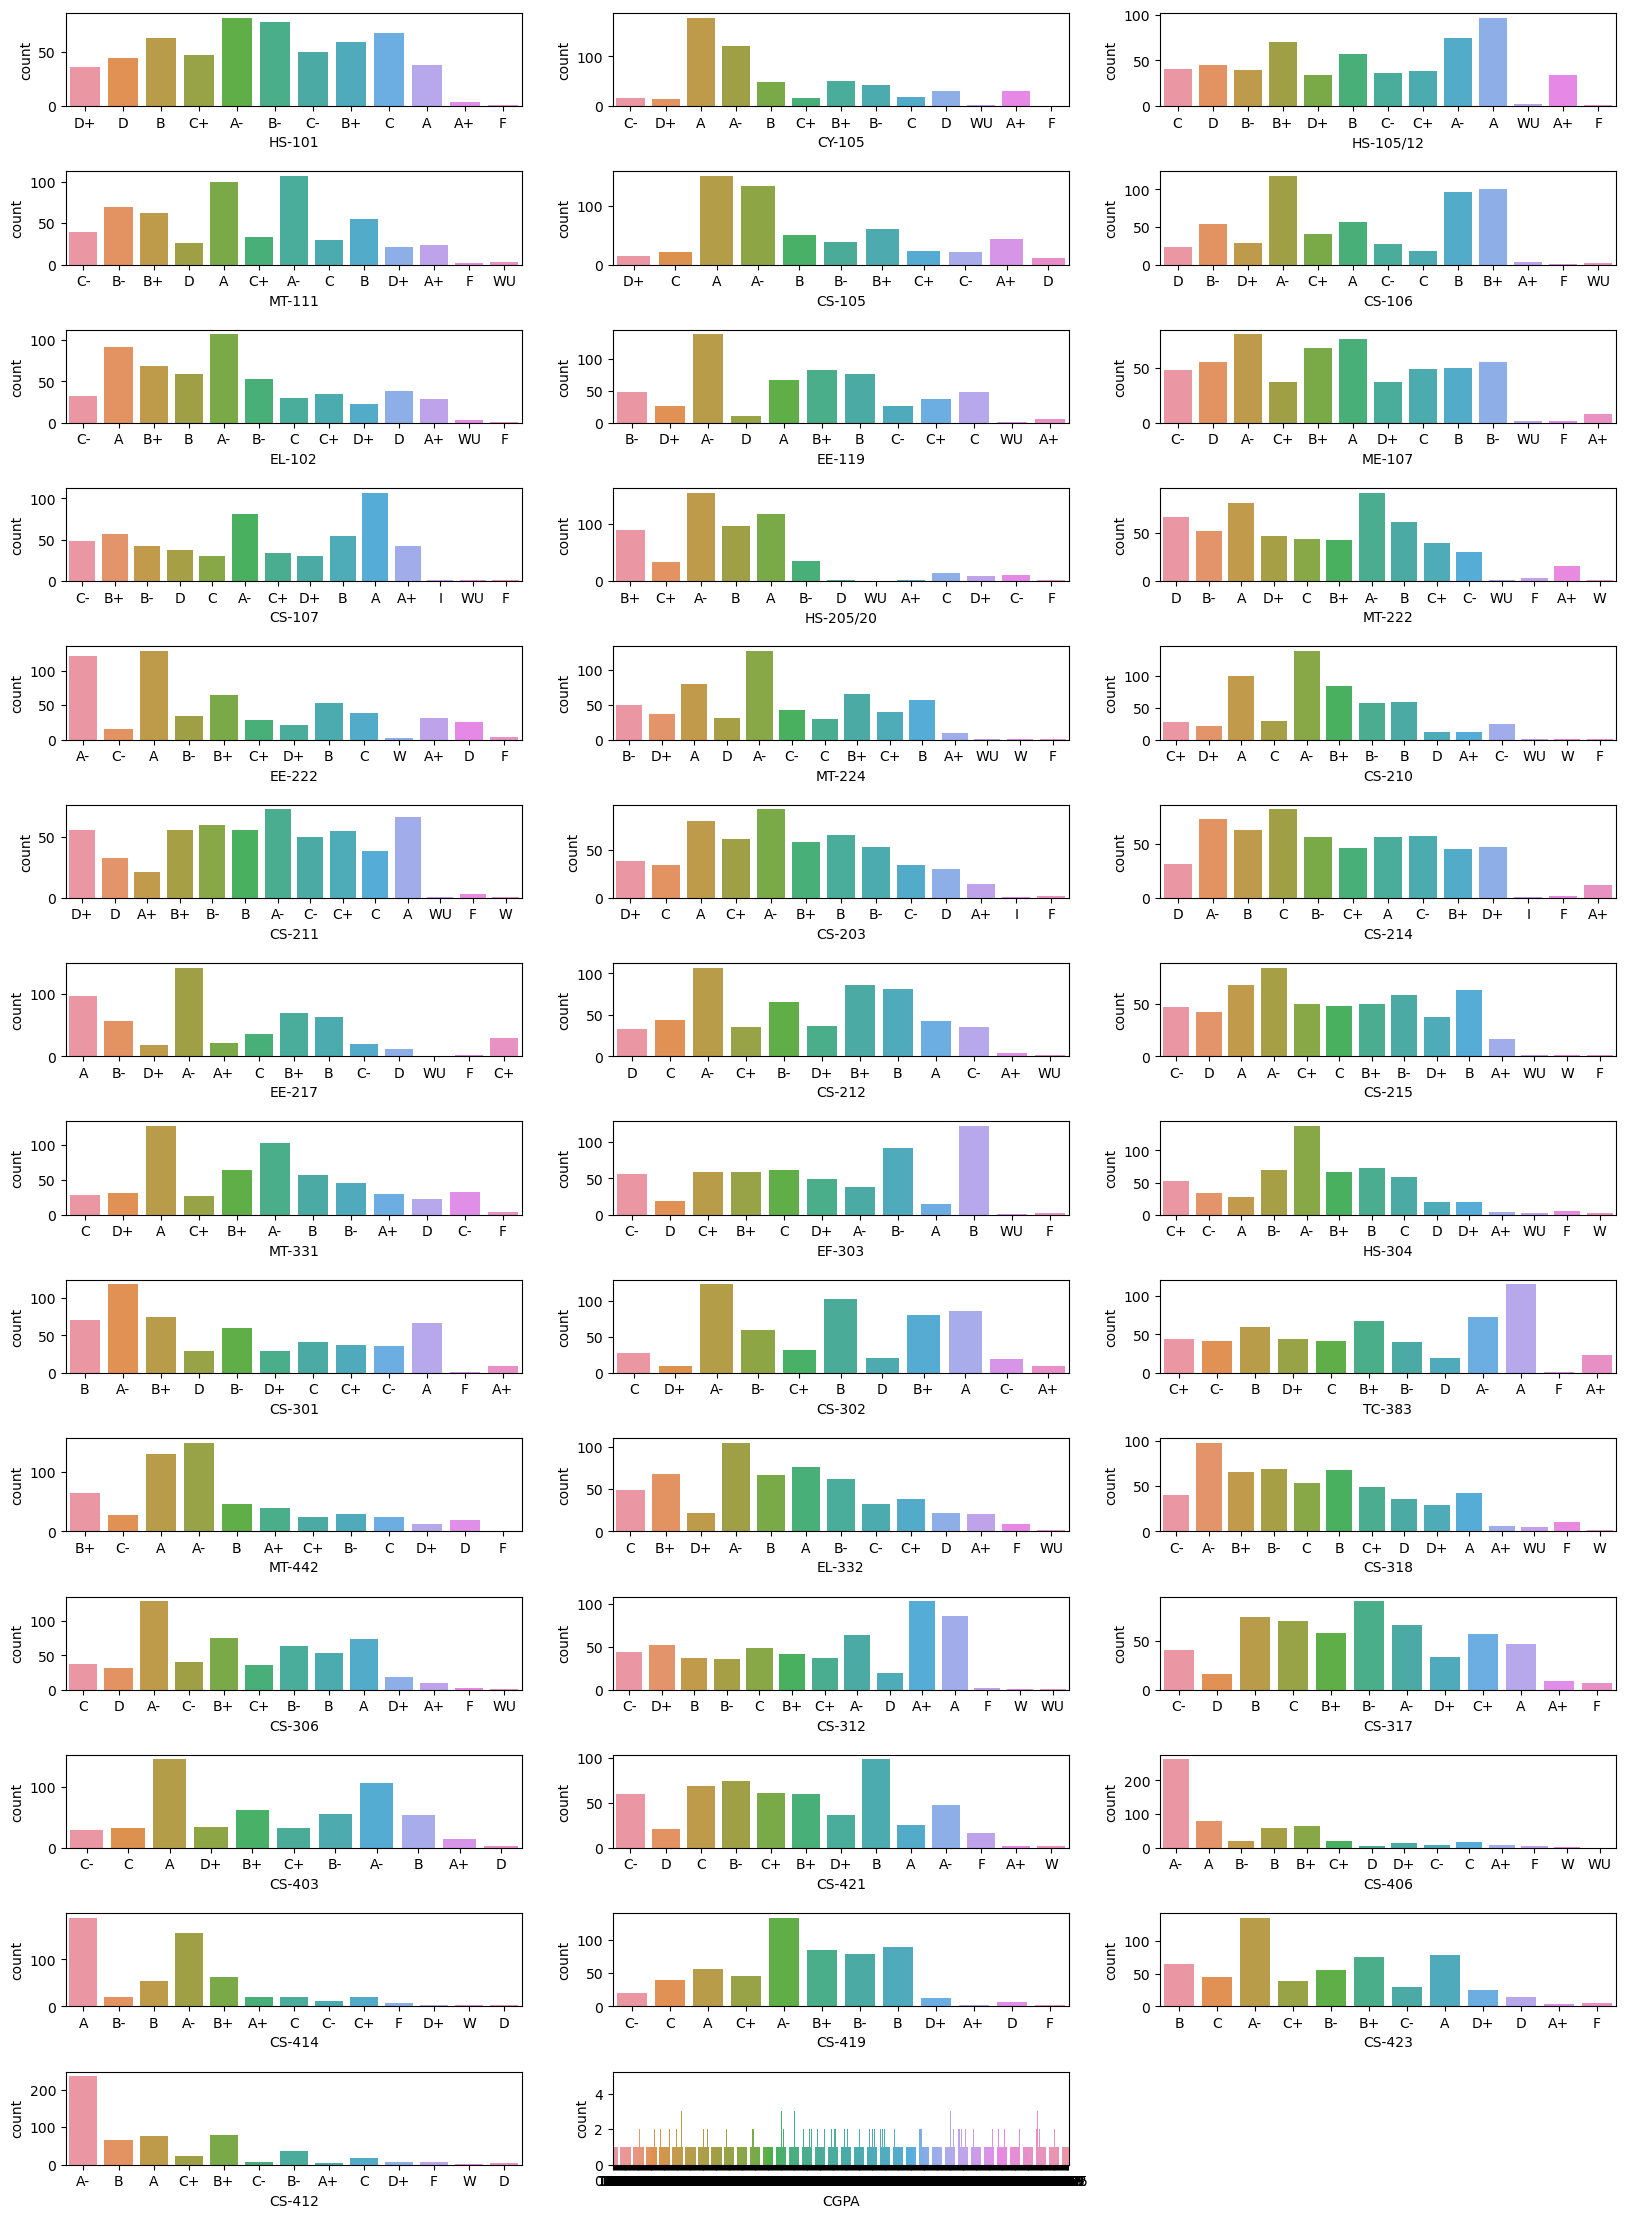

In [47]:
#understanding features
from tqdm.notebook import tqdm
plt.figure(figsize=(20,30))
p=1
for col in tqdm(df.columns[1:]):
    if p <= 44:
        plt.subplot(15, 3, p)
        sns.countplot(x=col,data=df)
        p += 1
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [48]:
# to do analysis need to convert object in numbers
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


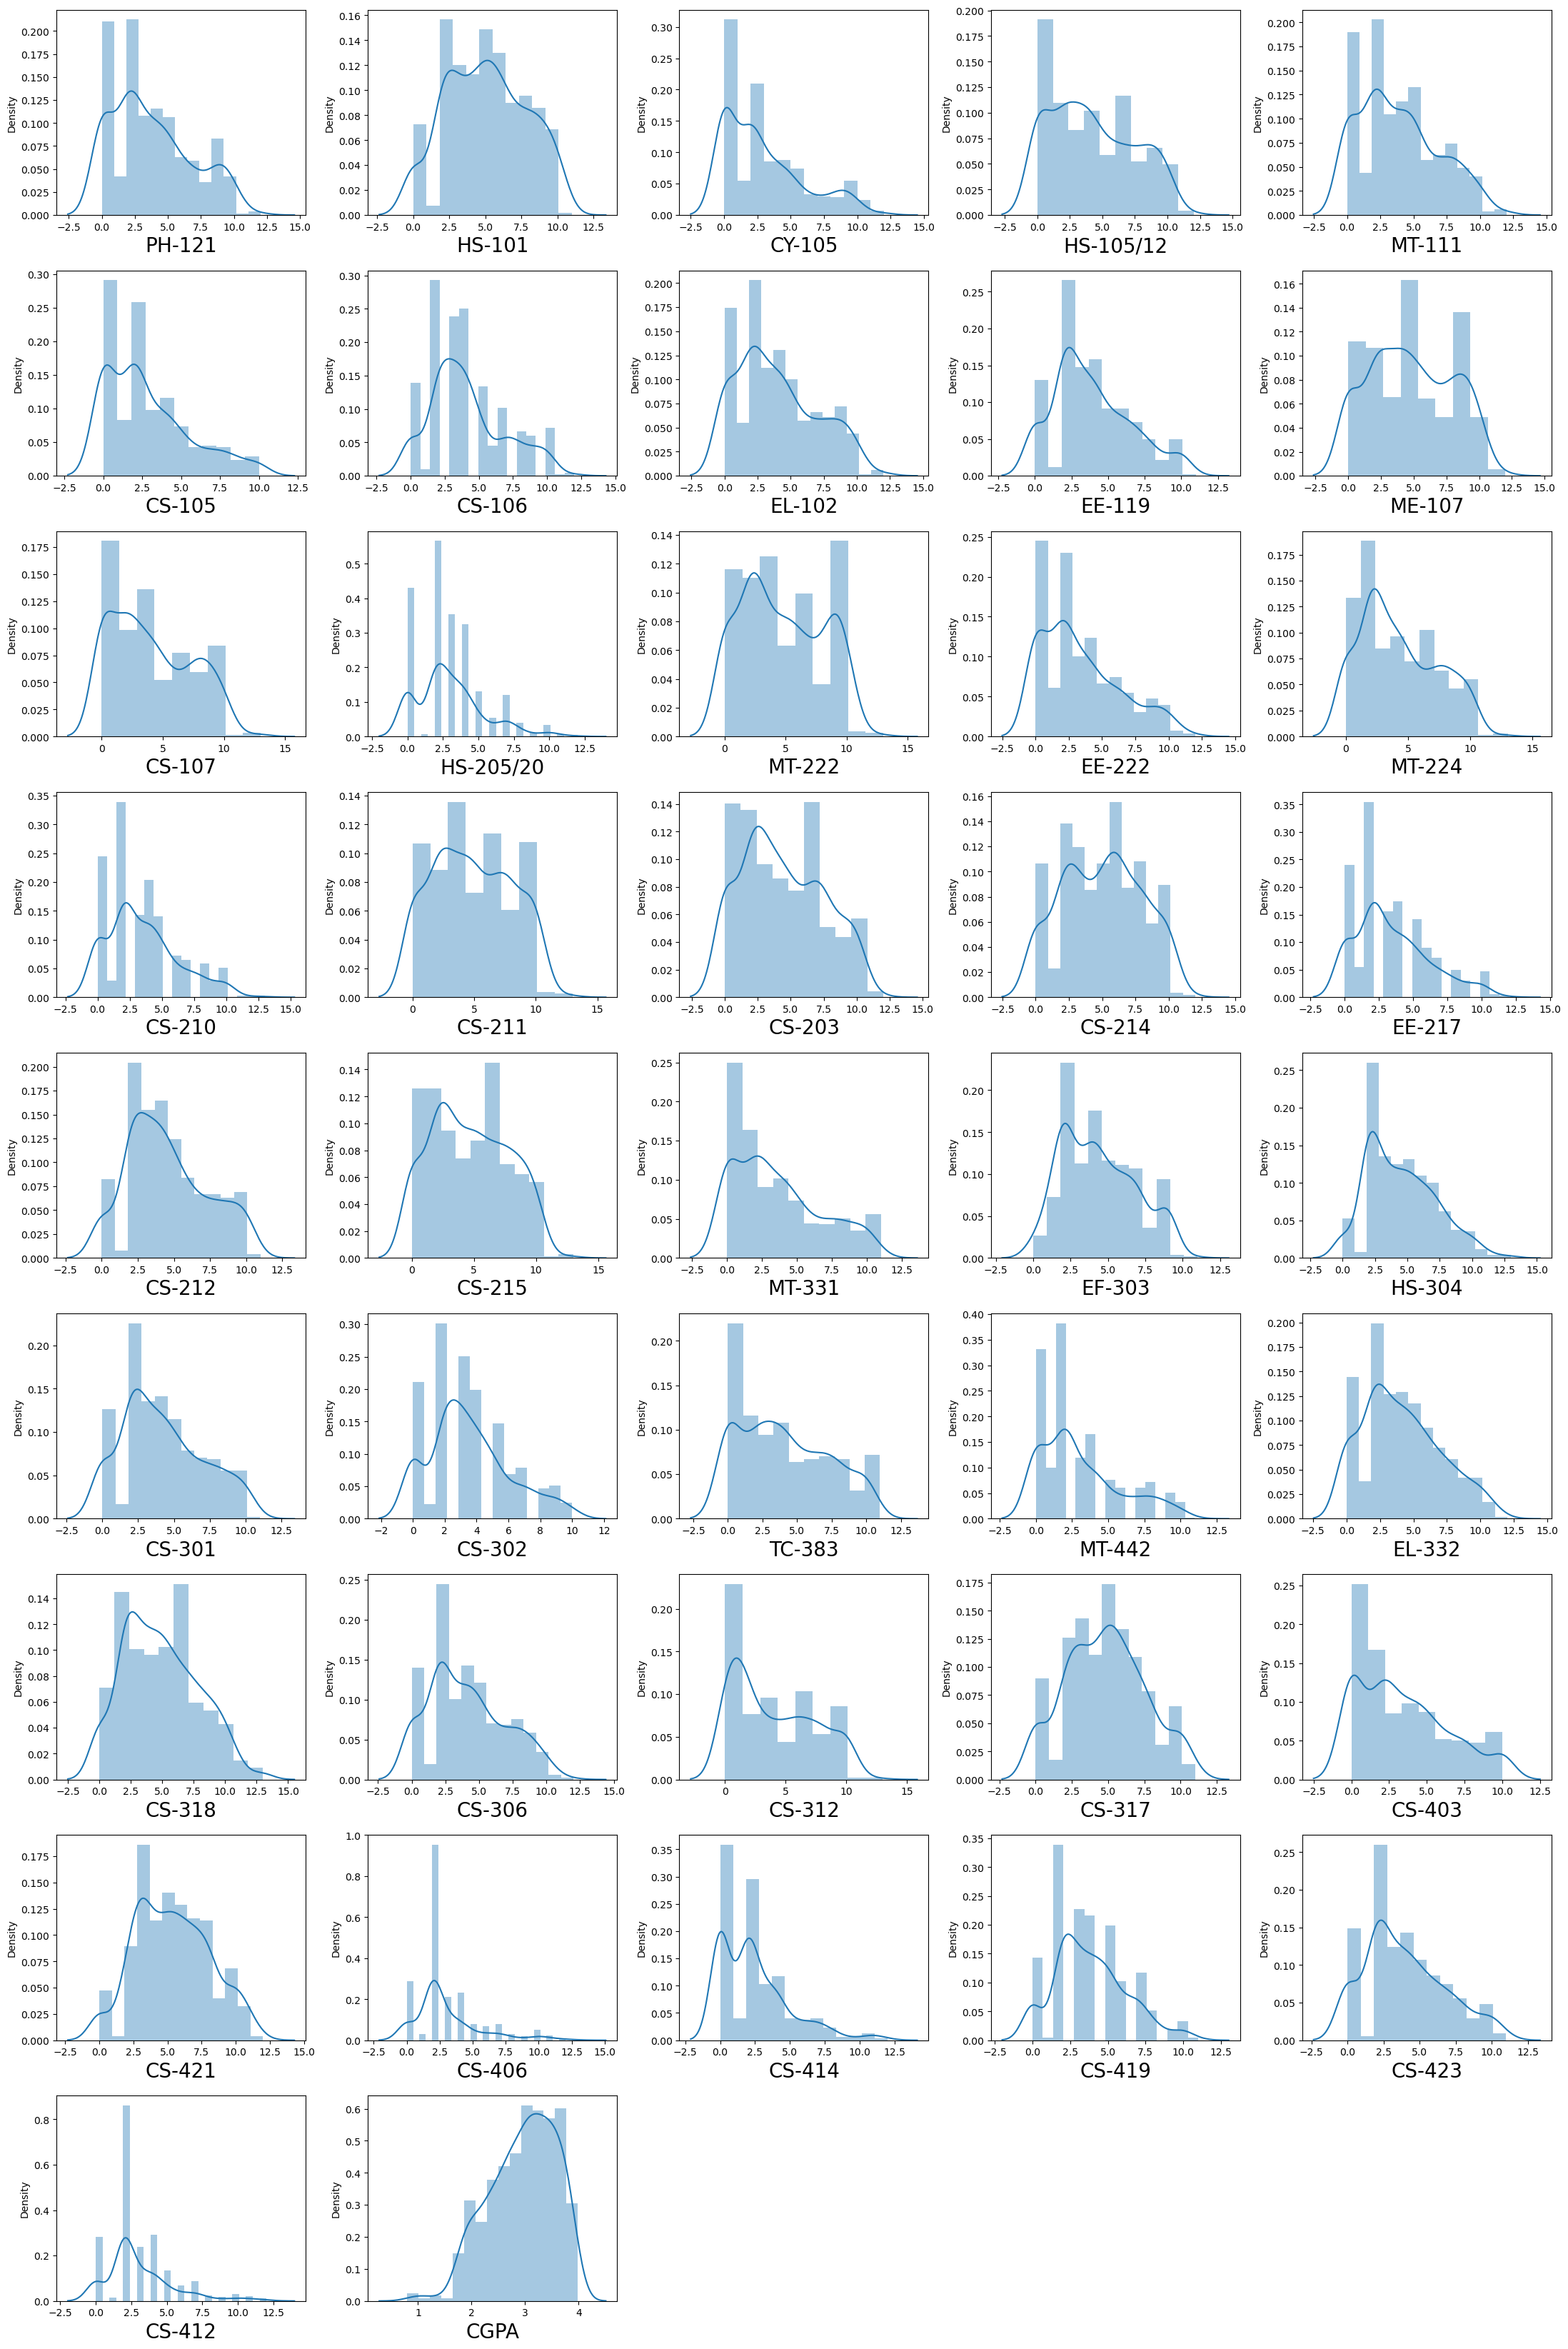

In [50]:
#lets check data distribution
plt.figure(figsize=(22,33), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=43:
        ax = plt.subplot(9,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [51]:
df.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

In [55]:
df.corr()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.382436,0.557843,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,0.533558,...,0.038184,0.464022,0.321264,0.290351,0.280166,0.152437,0.462770,0.094921,0.293815,-0.663135
HS-101,0.382436,1.000000,0.335074,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,0.336545,...,0.213380,0.364250,0.229546,0.301934,0.265551,0.225977,0.284668,0.228103,0.226039,-0.537170
CY-105,0.557843,0.335074,1.000000,0.510123,0.538380,0.578573,0.378223,0.447539,0.467250,0.464418,...,0.261555,0.472137,0.464575,0.349827,0.129957,0.008774,0.430053,0.120885,0.064912,-0.658282
HS-105/12,0.498561,0.473132,0.510123,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,0.320137,...,0.263143,0.478816,0.451907,0.415946,0.168150,0.142806,0.465352,0.235029,0.153293,-0.613989
MT-111,0.468968,0.432742,0.538380,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,0.471685,...,0.467946,0.555098,0.410540,0.511463,0.300391,0.228637,0.502473,0.400679,0.269792,-0.730095
CS-105,0.609990,0.400713,0.578573,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,0.455470,...,0.059711,0.387639,0.279329,0.236345,0.237615,0.121965,0.306827,0.045134,0.179777,-0.613169
CS-106,0.293963,0.312019,0.378223,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,0.281233,...,0.450752,0.416562,0.426402,0.397195,0.129554,0.108916,0.421989,0.339963,0.185782,-0.534995
EL-102,0.423942,0.349412,0.447539,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,0.461690,...,0.301324,0.466556,0.304240,0.368959,0.253133,0.242234,0.379308,0.369173,0.265289,-0.642262
EE-119,0.579964,0.309697,0.467250,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,0.572964,...,0.156809,0.445496,0.341988,0.359230,0.297664,0.214165,0.465913,0.244615,0.320746,-0.646829
ME-107,0.533558,0.336545,0.464418,0.320137,0.471685,0.455470,0.281233,0.461690,0.572964,1.000000,...,0.199848,0.462568,0.336647,0.345832,0.300913,0.154184,0.440407,0.220977,0.293638,-0.663023


every column in df has good correlation with  CGPA

In [56]:
#i am removing skewness from mcolumn which have more skewness(value above 1) and ignoring which have less to average skweness
df['CS-406'] = np.cbrt(df['CS-406'])
df['CS-414'] = np.cbrt(df['CS-414'])
df['CS-412'] = np.cbrt(df['CS-412'])

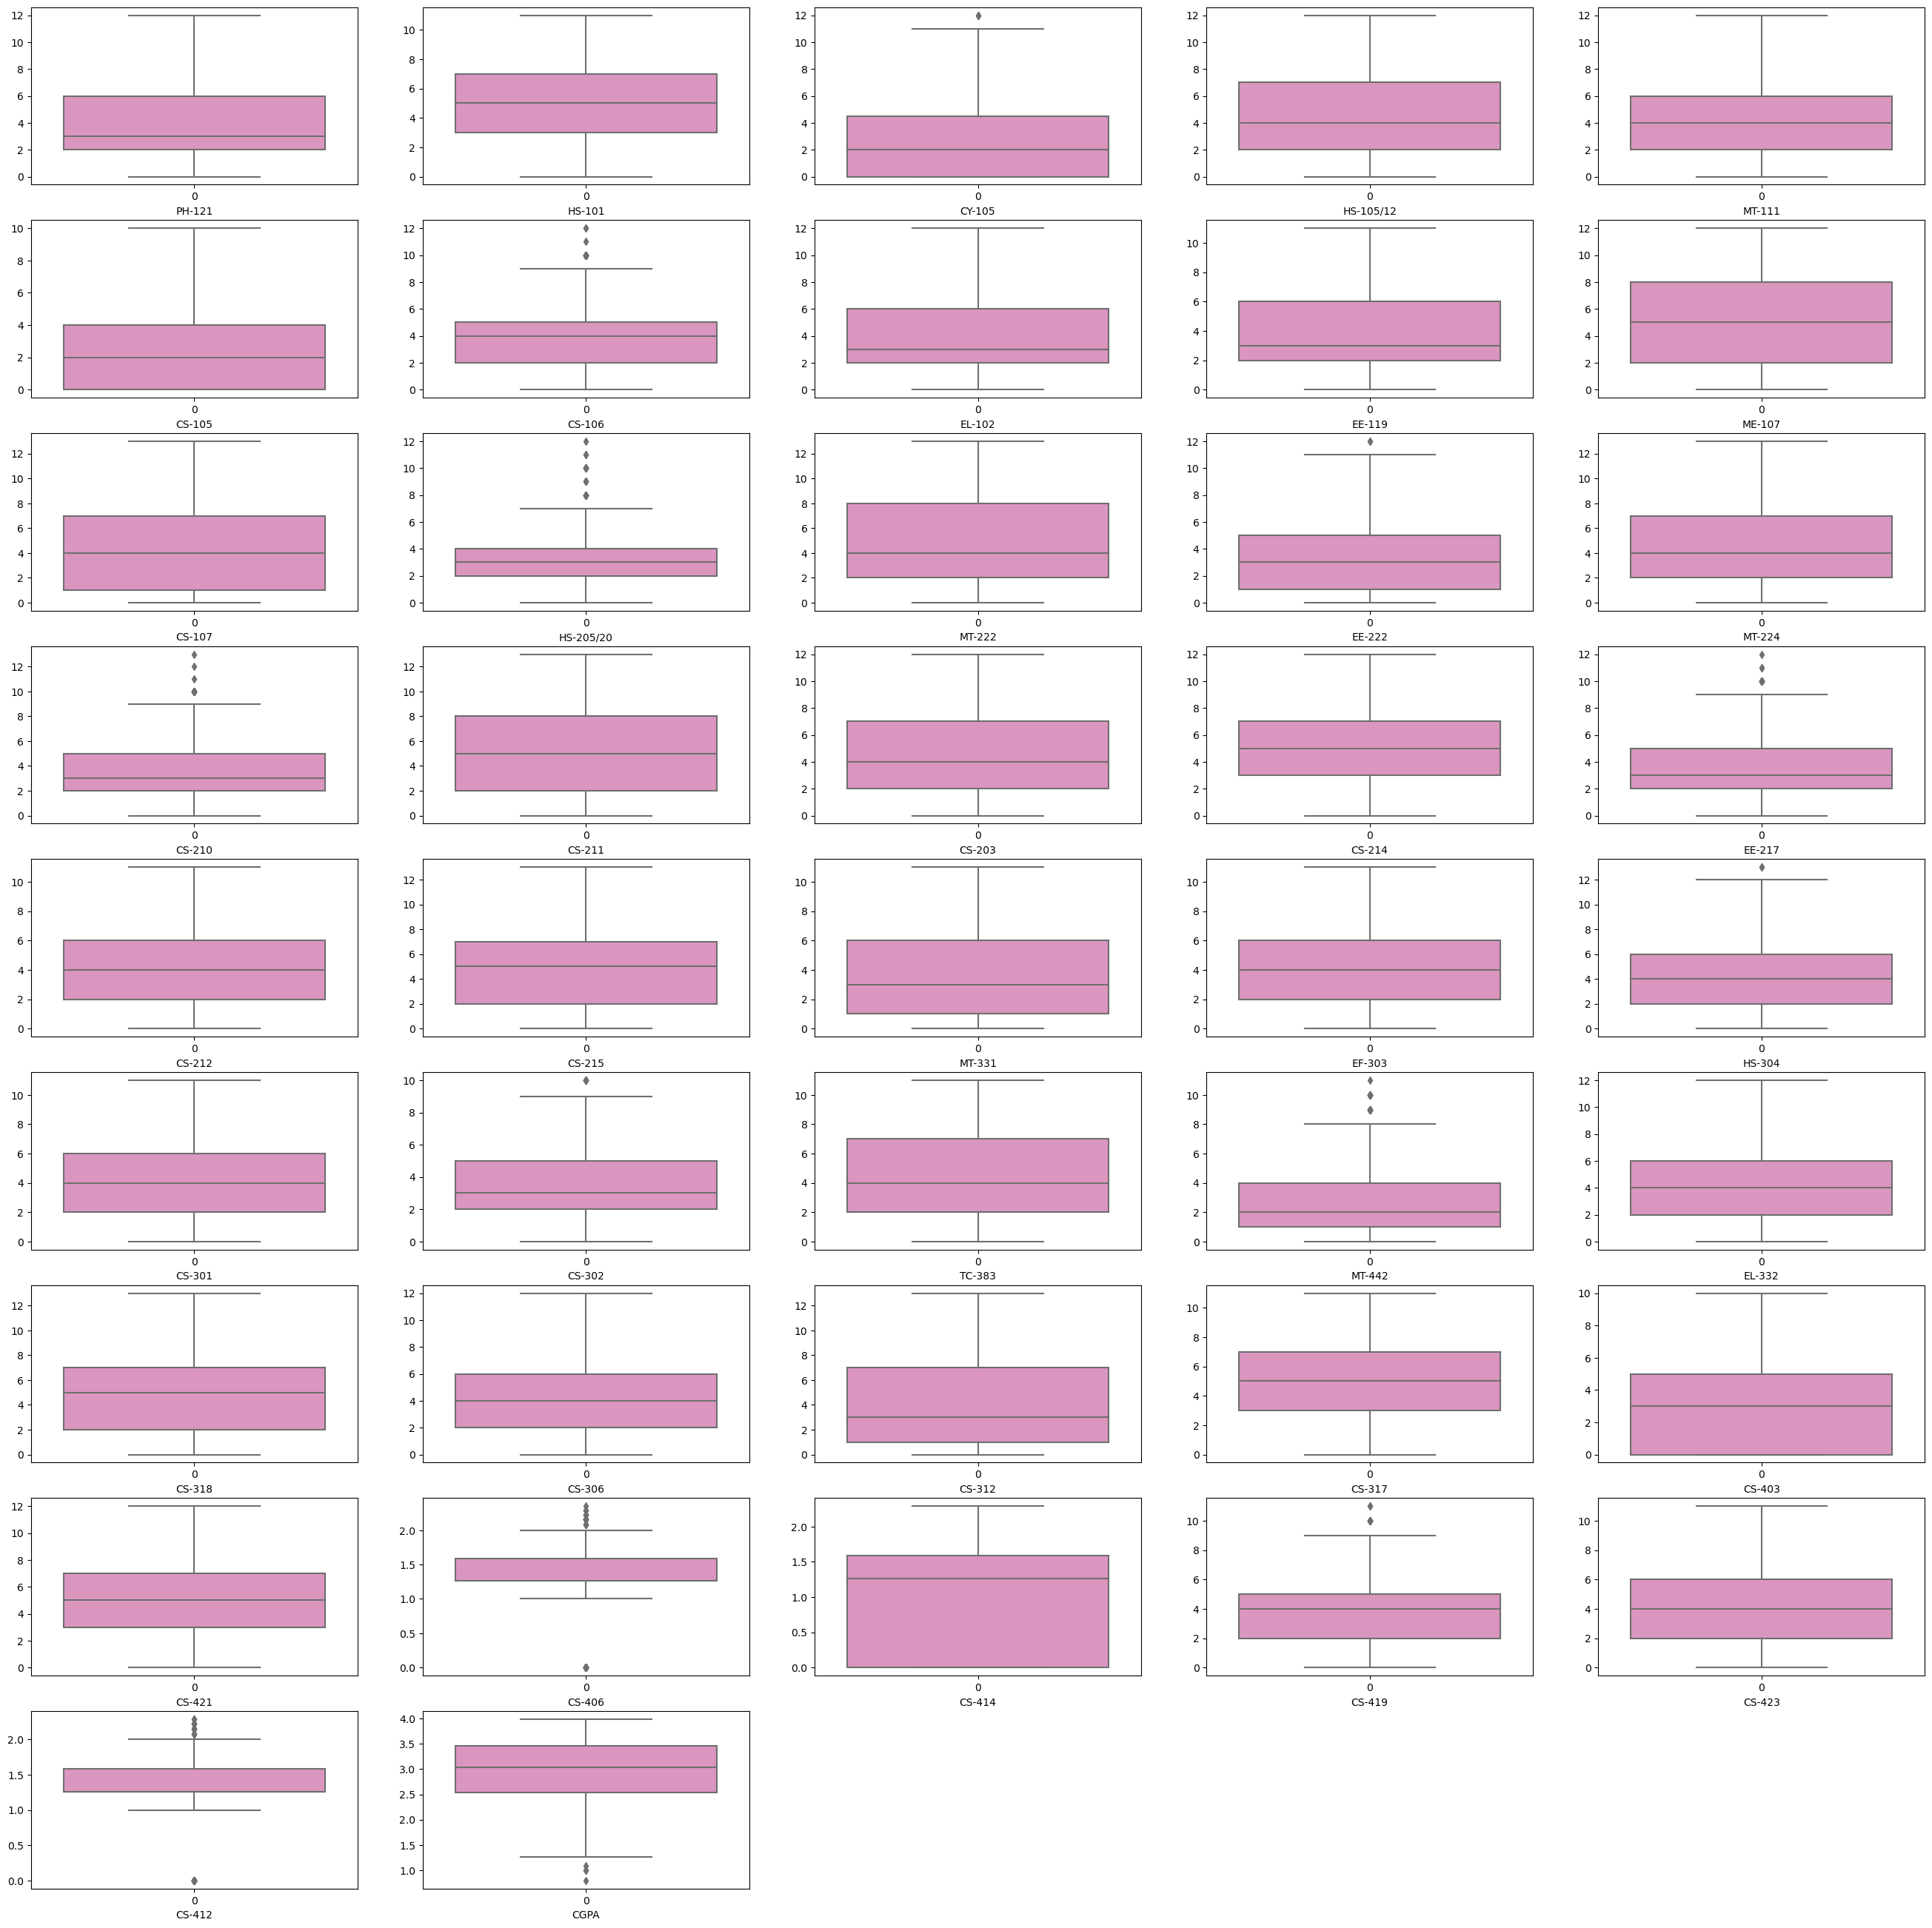

In [57]:
plt.figure(figsize=(33,33))
n=1
for i in df:
    if n<=43:
        plt.subplot(9,5,n)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    n+=1
plt.show()

### there not much outliers in data

In [58]:
x = df.drop('CGPA',axis=1)
y = df['CGPA']
print("feature dimension=",x.shape)
print('label Dimension',y.shape)

feature dimension= (571, 41)
label Dimension (571,)


In [59]:
y.value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,0.008395,-1.346874,1.740513,-0.346121,-0.025696
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,0.008395,0.988470,0.900418,0.727983,0.299855
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-2.214993,-1.346874,-1.619869,-0.704156,-2.275313
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.802608,0.622831,1.320466,1.086017,1.140267
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,0.008395,-1.346874,-0.779774,-0.704156,-2.275313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-2.214993,0.821067,0.060322,-0.346121,-2.275313
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,0.008395,0.622831,-0.779774,0.727983,-0.025696
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-2.214993,1.134799,0.060322,-0.704156,-0.025696
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,1.455739,1.134799,-0.359726,0.369948,0.969195


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [62]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('maximum r2 score',maxAccu,'on Random_state',maxRS)

maximum r2 score 0.962562011542644 on Random_state 19


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = maxRS)

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [65]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print(LR)
print('R2_Score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_LR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score: 0.9689860110784597
R2_score on training data: 91.7288424829008
mean absolute error: 0.08951478397148999
Mean Squared Error: 0.012423662421373381
root mean squared error: 0.11146148402642674


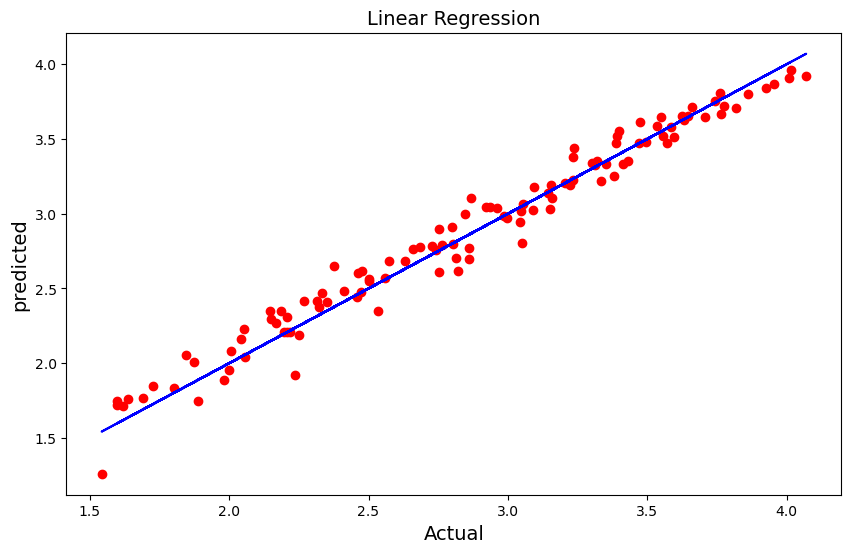

In [66]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title('Linear Regression',fontsize=14)
plt.show()

In [67]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print(knn)
print('R2_Score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,pred_knn))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

KNeighborsRegressor()
R2_Score: 0.9461523478269872
R2_score on training data: 92.94718121507445
mean absolute error: 0.09929391304347823
Mean Squared Error: 0.021570429217391315
root mean squared error: 0.1468687482665775


In [68]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print(rfr )
print('R2_Score:',r2_score(y_test,pred_rfr ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Mean Squared Error:',mean_squared_error(y_test,pred_rfr))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

RandomForestRegressor()
R2_Score: 0.9412046048536216
R2_score on training data: 98.69338373104098
mean absolute error: 0.10796086956521732
Mean Squared Error: 0.023552408659130383
root mean squared error: 0.1534679401670928


In [69]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print(GBR )
print('R2_Score:',r2_score(y_test,pred_GBR ))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('mean absolute error:',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred_GBR)))

GradientBoostingRegressor()
R2_Score: 0.9519154087891146
R2_score on training data: 99.5367599577428
mean absolute error: 0.10056427160953933
Mean Squared Error: 0.01926184762576189
root mean squared error: 0.13878705856729542


In [70]:
from sklearn.model_selection import cross_val_score

In [72]:
score = cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_LR) - score.mean())*100)

[0.8905249  0.93405529 0.89720056 0.93541082 0.84444841]
0.9003279954468368
difference between R2 score and cross validation score is: 6.865801563162288


In [73]:
score1 = cross_val_score(GBR,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between R2 score and cross validation score is:',(r2_score(y_test,pred_GBR)-score1.mean())*100)

[0.91987833 0.95673678 0.96262674 0.95056716 0.87353255]
0.9326683100078379
difference between R2 score and cross validation score is: 1.9247098781276728


## GBR id best performing model

In [74]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameters = {'n_estimators':[1, 2, 3, 4, 5],'learning_rate':[0.1,0.2],'max_depth':[1,2,3,4]}
gscv = GridSearchCV(GBR,parameters,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [88]:
gscv.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 5}

In [104]:
model = GradientBoostingRegressor()

In [105]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean Squared Error:',mean_squared_error(y_test,pred_GBR))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score: 0.9553308031833503
mean absolute error: 0.09747981825450691
Mean Squared Error: 0.01926184762576189
root mean squared error: 0.13376733632774537


In [109]:
import pickle
filename = 'CGPA_prediction.pkl'
pickle.dump(model,open(filename,'wb'))

In [110]:
import pickle
load_model = pickle.load(open('CGPA_prediction.pkl','rb'))
result = load_model.score(x_test,y_test)
print(result*100)

95.53308031833502


In [111]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=['Predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
Predicted,3.297289,2.360099,2.662326,2.035479,2.088771,2.179642,2.210062,3.614773,3.810302,3.429663,...,3.541306,2.652173,3.523294,2.206308,2.768781,3.304128,3.726466,2.181493,3.740846,3.779446
original,3.332000,2.208000,2.468000,2.084000,2.206000,2.418000,2.352000,3.578000,3.798000,3.328000,...,3.521000,2.777000,3.585000,2.228000,2.782000,3.179000,3.723000,2.352000,3.806000,3.844000
